In [1]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-06-11 10:29:03--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2023-06-11 10:29:04 (8.93 MB/s) - ‘names.txt’ saved [228145/228145]



In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
len(words)

32033

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

15

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [6]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))
chars = ['.'] + chars
stoi = {s:i for i, s in enumerate(chars)}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [11]:
itos = {i:s for s,i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

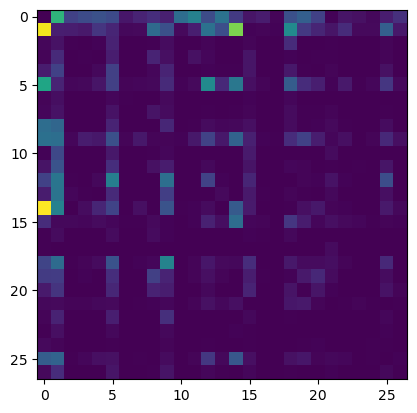

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(N)

In [13]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [14]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [17]:
P.sum(1).shape

torch.Size([27])

In [16]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [18]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    ix = 0
    name = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        name.append(itos[ix])
    print(''.join(name))

junide
janasah
p
cony
a


In [19]:
log_likelihood = 0.0
n = 0
for w in ['sagarjq']:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(log_likelihood)   
nll = -log_likelihood
nll / n

.s: 0.0641 -2.7468
sa: 0.1478 -1.9119
ag: 0.0050 -5.3016
ga: 0.1694 -1.7755
ar: 0.0963 -2.3405
rj: 0.0020 -6.1934
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
tensor(-30.5847)


tensor(3.8231)

In [76]:
# create the training set of all the bigrams
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [77]:
xs

tensor([ 0,  5, 13, 13,  1])

In [78]:
ys

tensor([ 5, 13, 13,  1,  0])

In [22]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

In [91]:
xenc.shape

torch.Size([5, 27])

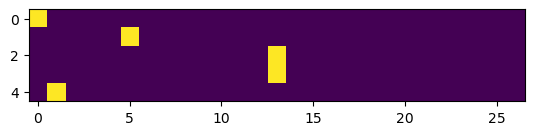

In [92]:
plt.imshow(xenc)

In [93]:
xenc.dtype

torch.float32

In [96]:
W = torch.randn((27, 27))

In [97]:
xs

tensor([ 0,  5, 13, 13,  1])

In [98]:
ys

tensor([ 5, 13, 13,  1,  0])

In [108]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [109]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [110]:
probs.shape

torch.Size([5, 27])

In [111]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    p = probs[i, y]
    logp = torch.log(p)
    nll = -logp
    nlls[i] = nll

nlls.mean().item()

3.7693049907684326

In [112]:
xs

tensor([ 0,  5, 13, 13,  1])

In [113]:
ys

tensor([ 5, 13, 13,  1,  0])

In [133]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad = True)

In [153]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [154]:
# backward pass
W.grad = None
loss.backward()
loss

tensor(3.6494, grad_fn=<NegBackward0>)

In [155]:
W.data += - 0.1 * W.grad

In [23]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [24]:
for k in range(100):
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    
    W.grad = None
    loss.backward()
    
    W.data += -50 * W.grad

3.758953809738159
3.371100902557373
3.154043197631836
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097293376922607
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253881454467773
2.6139907836914062
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547366142272949
2.543415069580078
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.504261016845703
2.5029289722442627
2.5016605854034424
2.5004522800445557
2.4992990493774414
2.498197317123413
2.4971446990966797
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129

In [26]:
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
#         xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
#         logits = xenc @ W
#         counts = logits.exp()
#         p = counts / counts.sum(1, keepdims=True)
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))
        

fbalodouseyton.
za.
sabran.
han.
ke.


In [220]:
morvann.
akela.
az.
arileri.
chaiadayra.